<a href="https://colab.research.google.com/github/Chris-Zionna/Dengue-Prediction/blob/main/DenguePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df1=pd.read_csv('DengueClimate.csv')
df1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,1
1,1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,3
2,2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,3
3,3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,0
4,4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,597,597,32.300000,24.400000,28.500000,35.900000,24.400000,31.200000,23.300000,75.000000,...,1008.900000,50.400000,3.100000,252.500000,21.900000,9.000000,1.000000,1.000000,6729.0,3
598,598,598,32.700000,26.400000,29.300000,36.300000,26.400000,32.500000,22.600000,68.500000,...,1010.400000,50.500000,3.100000,242.700000,20.900000,8.000000,1.000000,1.000000,10541.0,0
599,599,599,33.000000,26.300000,29.800000,40.500000,26.300000,34.500000,23.900000,71.100000,...,1010.800000,30.500000,3.100000,195.300000,16.900000,8.000000,1.000000,1.000000,6396.0,3
600,600,600,35.100000,26.800000,30.600000,42.900000,29.100000,35.100000,23.300000,65.900000,...,1009.700000,32.700000,3.300000,187.600000,16.000000,7.000000,1.000000,1.000000,10883.0,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named df1

# Define severity levels and corresponding labels (increasing severity order)
severity_levels = ["Minimal to No risk", "Low Risk", "Moderate Risk", "High Risk", "Severe Risk"]

# Create an empty column for labels
df1["labels"] = pd.NA

# Loop through severity levels and assign labels based on 'cases' value
for level, threshold in zip(severity_levels, [0, 1000, 5000, 10000, 15000]):
  df1.loc[df1["cases"] > threshold, "labels"] = level

# Encode labels using LabelEncoder (optional)
le = LabelEncoder()
df1["labels"] = le.fit_transform(df1["labels"])

X = df1.drop(columns=["labels", "serial"])
y = df1["labels"]

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:")
for label, encoded_value in label_mapping.items():
  print(f"{label}: {encoded_value}")


Label Encoding Mapping:
High Risk: 0
Low Risk: 1
Minimal to No risk: 2
Moderate Risk: 3
Severe Risk: 4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


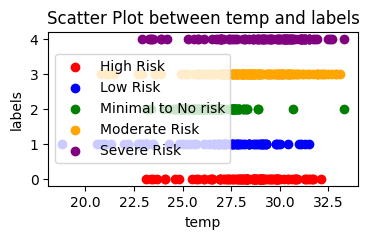

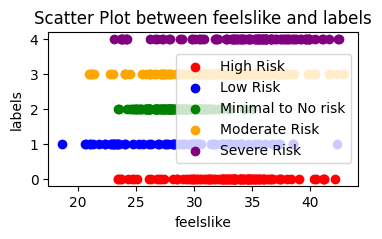

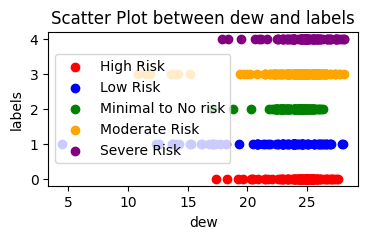

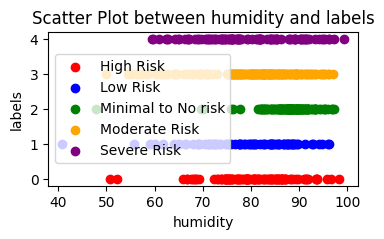

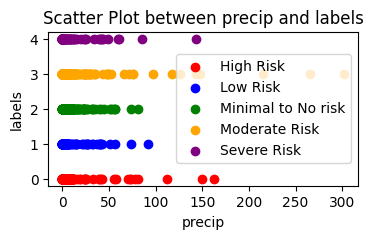

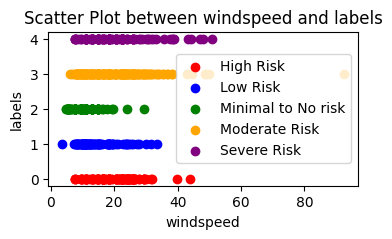

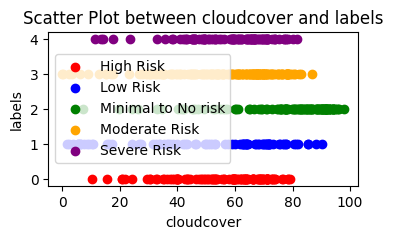

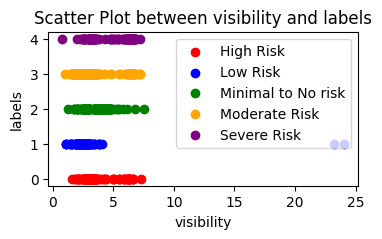

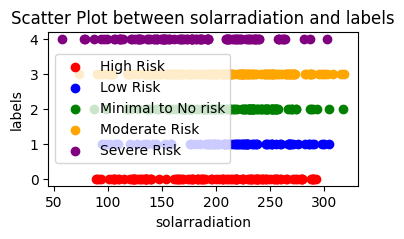

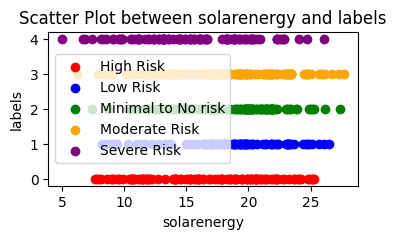

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_visualize = [ 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'windspeed',
                         'cloudcover', 'visibility', 'solarradiation',
                         'solarenergy']

target_column = 'labels'

severity_levels = {0: 'High Risk', 1: 'Low Risk', 2: 'Minimal to No risk', 3: 'Moderate Risk', 4: 'Severe Risk'}

severity_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'purple'}

for feature in features_to_visualize:
    plt.figure(figsize=(4,2))

    for severity, color in severity_colors.items():
        plt.scatter(df1[df1[target_column] == severity][feature],
                    df1[df1[target_column] == severity][target_column],
                    color=color,
                    label=severity_levels[severity])

    plt.title(f'Scatter Plot between {feature} and {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


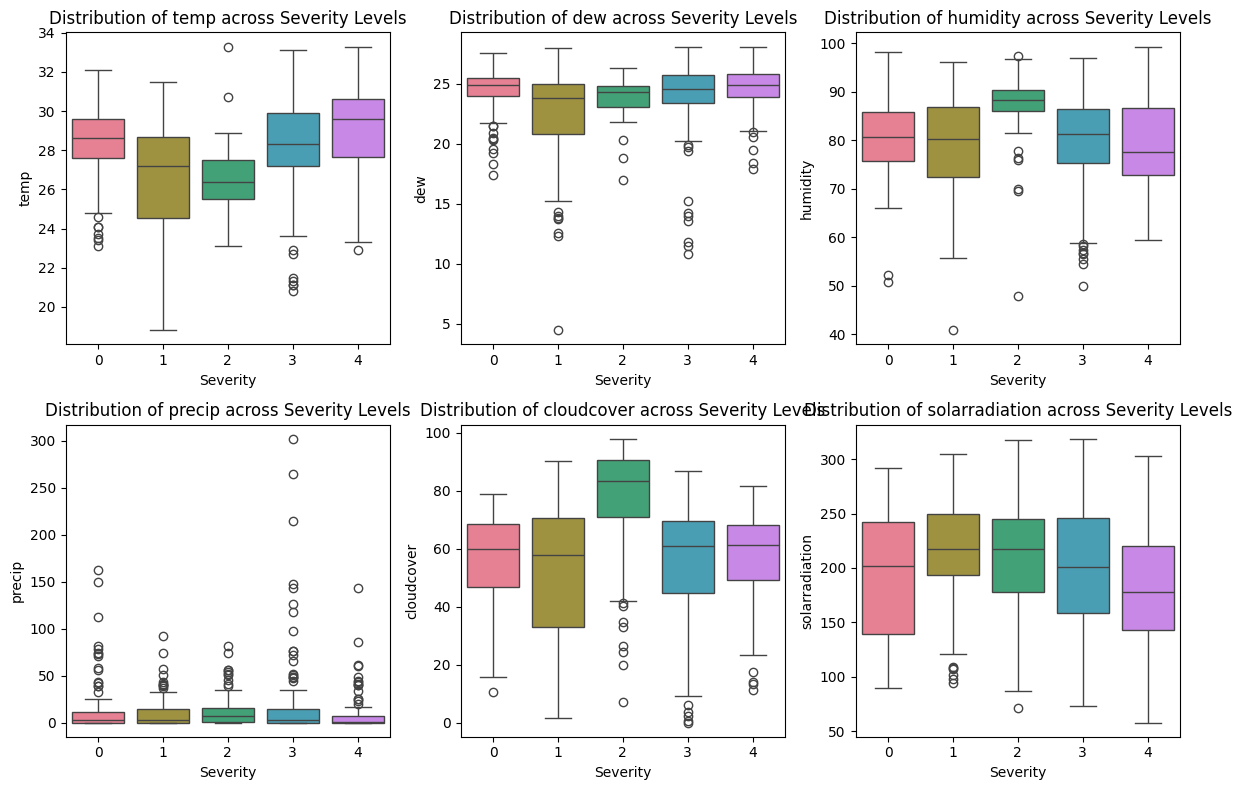

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

climatic_features = ['temp', 'dew', 'humidity', 'precip', 'cloudcover', 'solarradiation']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(climatic_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='labels', y=feature, data=df1, palette='husl')
    plt.title(f'Distribution of {feature} across Severity Levels')
    plt.xlabel('Severity')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [ ]:
split=int(0.8*df1.shape[0])
train_data=df1[:split]
test_data=df1[split:]
test_data=test_data.reset_index(drop=True)

features=train_data.columns[1:-1]
X_train=train_data[features]
y_train=train_data['labels']
X_test=test_data[features]
y_test=test_data['labels']


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(np.mean((y_pred**2) - (y_test**2)))
    score = model.score(X_test, y_test)
    acc = cross_val_score(model, X_test, y_test, cv=5).mean()

    print(f"Model: {name}")
    print(f"RMSE: {rmse}")
    print(f"Score: {score}")
    print(f"Cross-validation Accuracy: {acc}")
    print("-------------------------------")


Model: RandomForestRegressor
RMSE: 0.0411005620198448
Score: 0.9999816780232638
Cross-validation Accuracy: 0.9879152035290742
-------------------------------
Model: DecisionTreeRegressor
RMSE: 0.0
Score: 1.0
Cross-validation Accuracy: 0.9825454545454544
-------------------------------
Model: GradientBoostingRegressor
RMSE: 0.07786103964017084
Score: 0.999995925096981
Cross-validation Accuracy: 0.9825461564191279
-------------------------------
Model: LinearRegression
RMSE: nan
Score: -0.3650578442245864
Cross-validation Accuracy: 0.03102482475064914
-------------------------------
Model: Ridge
RMSE: nan
Score: -0.3643823787414988
Cross-validation Accuracy: 0.11791164281594843
-------------------------------
Model: Lasso
RMSE: 1.0017788883124799
Score: -0.5707728836975785
Cross-validation Accuracy: 0.30522174749597164
-------------------------------
Model: ElasticNet
RMSE: 0.9417090441532074
Score: -0.5527587847803805
Cross-validation Accuracy: 0.2963362616164276
-----------------------

In [ ]:
from sklearn.ensemble import VotingRegressor

rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
gb = GradientBoostingRegressor()

voting_regressor = VotingRegressor([('rf', rf), ('dt', dt), ('gb', gb)], weights=[0.4, 0.3, 0.3])

voting_regressor.fit(X_train, y_train)
y_pred = voting_regressor.predict(X_test)

rmse = np.sqrt(np.mean((y_pred**2) - (y_test**2)))
score = voting_regressor.score(X_test, y_test)
acc = cross_val_score(voting_regressor, X_test, y_test, cv=5).mean()

print("Custom Ensemble Model:")
print(f"RMSE: {rmse}")
print(f"Score: {score}")
print(f"Cross-validation Accuracy: {acc}")


Custom Ensemble Model:
RMSE: 0.034162683100972
Score: 0.9999939689983852
Cross-validation Accuracy: 0.9859915414950559


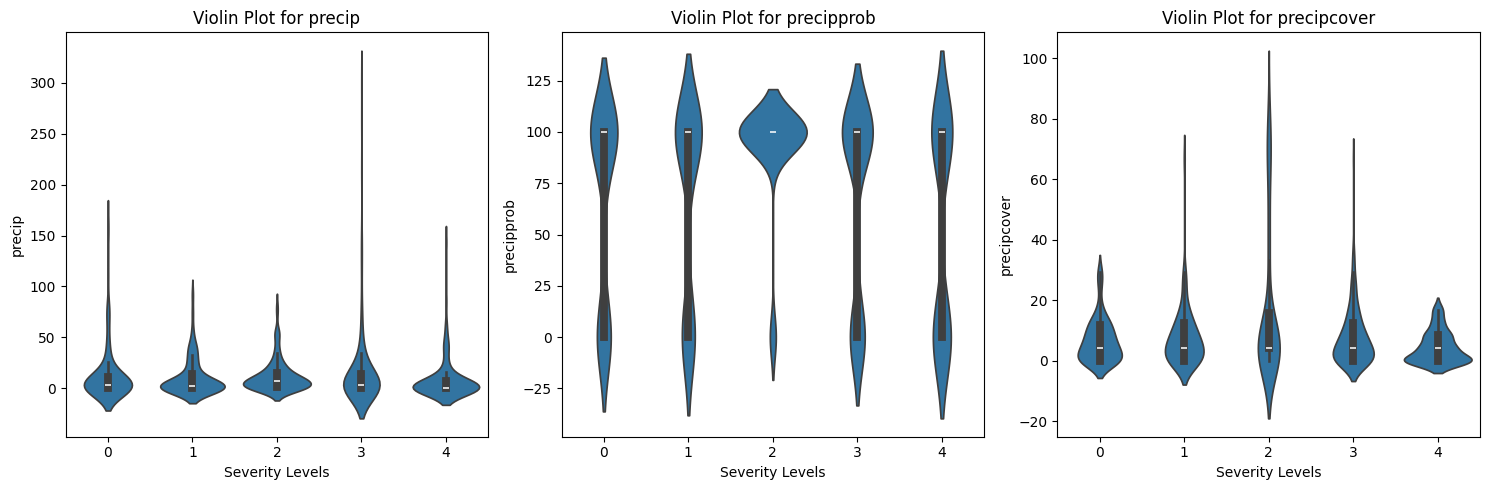

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

precip_variables = ['precip', 'precipprob', 'precipcover']

fig, axes = plt.subplots(nrows=1, ncols=len(precip_variables), figsize=(15, 5))

for i, var in enumerate(precip_variables):
    sns.violinplot(x='labels', y=var, data=df1, ax=axes[i])
    axes[i].set_title(f'Violin Plot for {var}')
    axes[i].set_xlabel('Severity Levels')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

selected_features = ['temp', 'humidity', 'precip', 'cloudcover', 'solarradiation', 'labels']

df_climatic = df1[selected_features]

df_climatic_excluding_labels = df_climatic.drop(columns=['labels'])

mean_thresholds = df_climatic_excluding_labels.mean()

association_data_binary = (df_climatic_excluding_labels > mean_thresholds).astype(int)

association_data_binary['labels'] = df_climatic['labels']

association_rules_severity = {}
for severity_level in df_climatic['labels'].unique():
    data_severity_level = association_data_binary[association_data_binary['labels'] == severity_level].drop(columns=['labels'])
    frequent_itemsets = apriori(data_severity_level, min_support=0.1, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    rules_sorted = rules.sort_values(by=['confidence'], ascending=False)
    first_three_associations = rules_sorted.iloc[:3]['antecedents']
    association_rules_severity[severity_level] = first_three_associations

for severity_level, associations in association_rules_severity.items():
    severity = {
        0: 'High Risk',
        1: 'Low Risk',
        2: 'Minimal to No Risk',
        3: 'Moderate Risk',
        4: 'Severe Risk'
    }
    print(f"Associations for {severity[severity_level]}:")
    print(associations)
    print()


Associations for Low Risk:
47    (temp, solarradiation, humidity)
14                    (temp, humidity)
24                      (precip, temp)
Name: antecedents, dtype: object

Associations for Moderate Risk:
14    (cloudcover, precip)
16      (precip, humidity)
2                 (precip)
Name: antecedents, dtype: object

Associations for High Risk:
7               (precip)
18    (precip, humidity)
5             (humidity)
Name: antecedents, dtype: object

Associations for Minimal to No Risk:
4                     (cloudcover, precip)
15      (precip, solarradiation, humidity)
14    (cloudcover, precip, solarradiation)
Name: antecedents, dtype: object

Associations for Severe Risk:
20      (precip, humidity)
18    (cloudcover, precip)
7                 (precip)
Name: antecedents, dtype: object

